Importa as bibliotecas utilizadas

In [1]:
from customtkinter import *
from PIL import Image, ImageTk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Pedro Rebello: Escolaridade do Pai x Tipo de formação do candidato

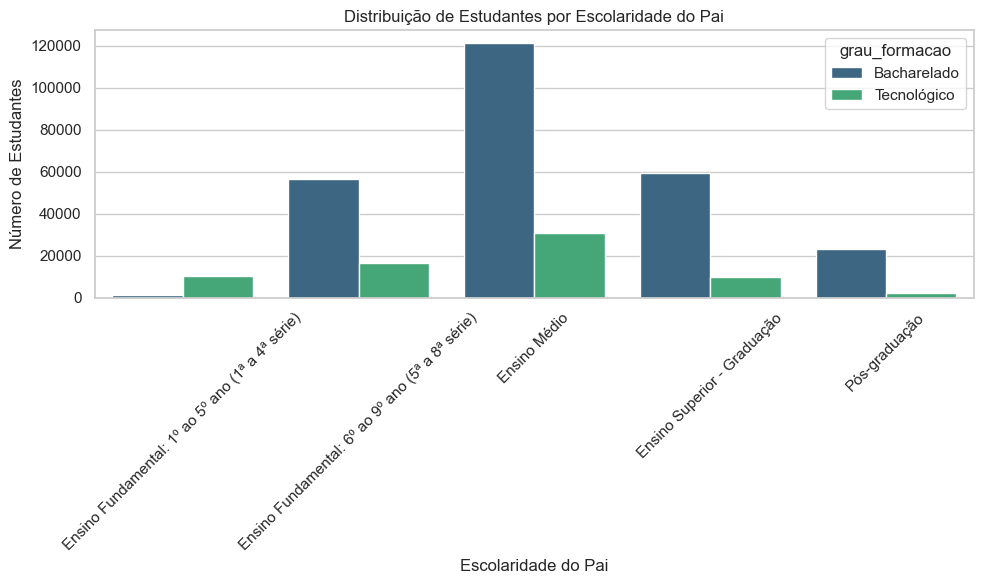

Média de estudantes por categoria: 33187.0
Mediana de estudantes por categoria: 19874.5
Desvio padrão de estudantes por categoria: 35187.89002767856


In [7]:
# Carregando os dados
pai_curso = pd.read_table('microdados2022_arq10.txt', sep=';', header=None,
                          names=['ano', 'cod_curso', 'esc_pai'])
cursos_enade = pd.read_excel('cursos_grau.xlsx', usecols=[0, 1], 
                             names=['grau_formacao', 'cod_curso'])
pai_curso['esc_pai'] = pai_curso['esc_pai'].replace(['', ' '], 'Desconhecido')

# Dicionário de escolaridades
escolaridades_dic = {
    'A': 'Nenhuma',
    'B': 'Ensino Fundamental: 1º ao 5º ano (1ª a 4ª série)',
    'C': 'Ensino Fundamental: 6º ao 9º ano (5ª a 8ª série)',
    'D': 'Ensino Médio',
    'E': 'Ensino Superior - Graduação',
    'F': 'Pós-graduação'
}

pai_curso['esc_pai'] = pai_curso['esc_pai'].map(escolaridades_dic).fillna(pai_curso['esc_pai'])

# Mesclando os dados
dados = pd.merge(pai_curso, cursos_enade, on='cod_curso')

# Agrupando os dados
grouped = dados.groupby(['grau_formacao', 'esc_pai'])
contagem = grouped.size().reset_index(name='count')

# Configurando o estilo do seaborn
sns.set(style="whitegrid")

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='esc_pai', y='count', hue='grau_formacao', data=contagem, palette='viridis')

# Ajustando o gráfico
barplot.set_title('Distribuição de Estudantes por Escolaridade do Pai')
barplot.set_xlabel('Escolaridade do Pai')
barplot.set_ylabel('Número de Estudantes')
plt.xticks(rotation=45)
plt.tight_layout()

# Salvando o gráfico
plt.savefig('grafico_barras.png', dpi=300)

# Exibindo o gráfico
plt.show()

# Utilizando numpy para calcular estatísticas adicionais
media_estudantes = np.mean(contagem['count'])
mediana_estudantes = np.median(contagem['count'])
desvio_padrao_estudantes = np.std(contagem['count'])

print(f"Média de estudantes por categoria: {media_estudantes}")
print(f"Mediana de estudantes por categoria: {mediana_estudantes}")
print(f"Desvio padrão de estudantes por categoria: {desvio_padrao_estudantes}")


# Luiz Felipe: Renda familiar dos candidatos

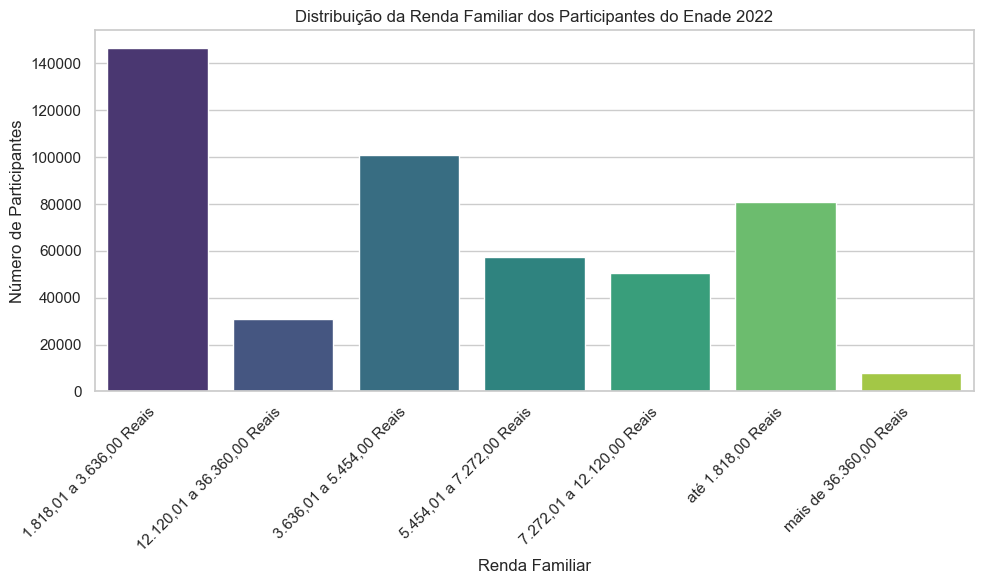

Média de participantes por faixa de renda: 67889.14285714286
Mediana de participantes por faixa de renda: 57393.0
Desvio padrão de participantes por faixa de renda: 42890.619372101035


In [3]:
# Definindo as colunas e carregando os dados
colunas = ['CO_CURSO', 'Data', 'renda_familiar']
file_path = 'microdados2022_arq14.txt'
df = pd.read_csv(file_path, delimiter=';', names=colunas, header=0, on_bad_lines='skip')

# Convertendo a coluna 'Data' para datetime
df['Data'] = pd.to_datetime(df['Data'], errors='coerce')

# Dicionário de renda familiar
Dicionario_renda = {
    "A": "até 1.818,00 Reais",
    "B": "1.818,01 a 3.636,00 Reais",
    "C": "3.636,01 a 5.454,00 Reais",
    "D": "5.454,01 a 7.272,00 Reais",
    "E": "7.272,01 a 12.120,00 Reais",
    "F": "12.120,01 a 36.360,00 Reais",
    "G": "mais de 36.360,00 Reais"
}

df['renda_familiar_desc'] = df['renda_familiar'].map(Dicionario_renda)

# Contagem de renda familiar
renda_counts = df['renda_familiar_desc'].value_counts().sort_index()

# Utilizando numpy para calcular estatísticas adicionais
media_renda = np.mean(renda_counts.values)
mediana_renda = np.median(renda_counts.values)
desvio_padrao_renda = np.std(renda_counts.values)



# Configurando o estilo do seaborn
sns.set(style="whitegrid")

# Plotando o gráfico
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=renda_counts.index, y=renda_counts.values, palette='viridis')
barplot.set_title('Distribuição da Renda Familiar dos Participantes do Enade 2022')
barplot.set_xlabel('Renda Familiar')
barplot.set_ylabel('Número de Participantes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Salvando e exibindo o gráfico
plt.savefig('grafico_renda_familiar.png', dpi=300)
plt.show()


print(f"Média de participantes por faixa de renda: {media_renda}")
print(f"Mediana de participantes por faixa de renda: {mediana_renda}")
print(f"Desvio padrão de participantes por faixa de renda: {desvio_padrao_renda}")

# Gabriel Francisco: Tipos de escola onde o canditado estudou

Média de respostas por categoria: 79203.0
Mediana de respostas por categoria: 20728.5
Desvio padrão de respostas por categoria: 115144.47197759865


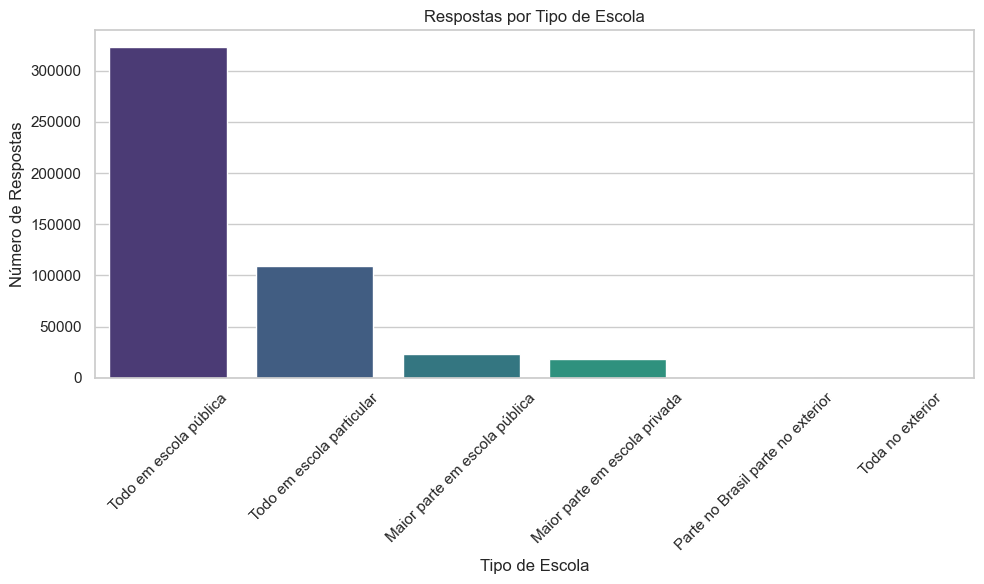

In [4]:
# Configurações de estilo do Seaborn
sns.set(style="whitegrid")

# Dados originais
colunas = ['ano', 'numero', 'resposta']
df = pd.read_csv('microdados2022_arq23.txt', delimiter=';', names=colunas, header=0, on_bad_lines='skip')
contagem_respostas = df['resposta'].value_counts()

dados_dic = {
    'A': 'Todo em escola pública',
    'B': 'Todo em escola particular',
    'C': 'Toda no exterior',
    'D': 'Maior parte em escola pública',
    'E': 'Maior parte em escola privada',
    'F': 'Parte no Brasil parte no exterior'
}

contagem_respostas.rename(index=dados_dic, inplace=True)

# Utilizando numpy para calcular estatísticas adicionais
media_respostas = np.mean(contagem_respostas.values)
mediana_respostas = np.median(contagem_respostas.values)
desvio_padrao_respostas = np.std(contagem_respostas.values)

print(f"Média de respostas por categoria: {media_respostas}")
print(f"Mediana de respostas por categoria: {mediana_respostas}")
print(f"Desvio padrão de respostas por categoria: {desvio_padrao_respostas}")

# Derretendo o DataFrame para trabalhar com o Seaborn
df_melted = contagem_respostas.reset_index()
df_melted.columns = ['Tipo de Escola', 'Número de Respostas']

# Criando o gráfico de barras com Seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='Tipo de Escola', y='Número de Respostas', hue='Tipo de Escola', data=df_melted, palette='viridis')

# Ajustando o gráfico
barplot.set_title('Respostas por Tipo de Escola')
barplot.set_xlabel('Tipo de Escola')
barplot.set_ylabel('Número de Respostas')
plt.xticks(rotation=45)
plt.tight_layout()

# Salvando o gráfico
plt.savefig('respostas_por_categoria.png', dpi=300)

# Exibindo o gráfico
plt.show()


# Carlos Eduardo: Distribuição de horas de estudo por quantidade de respostas

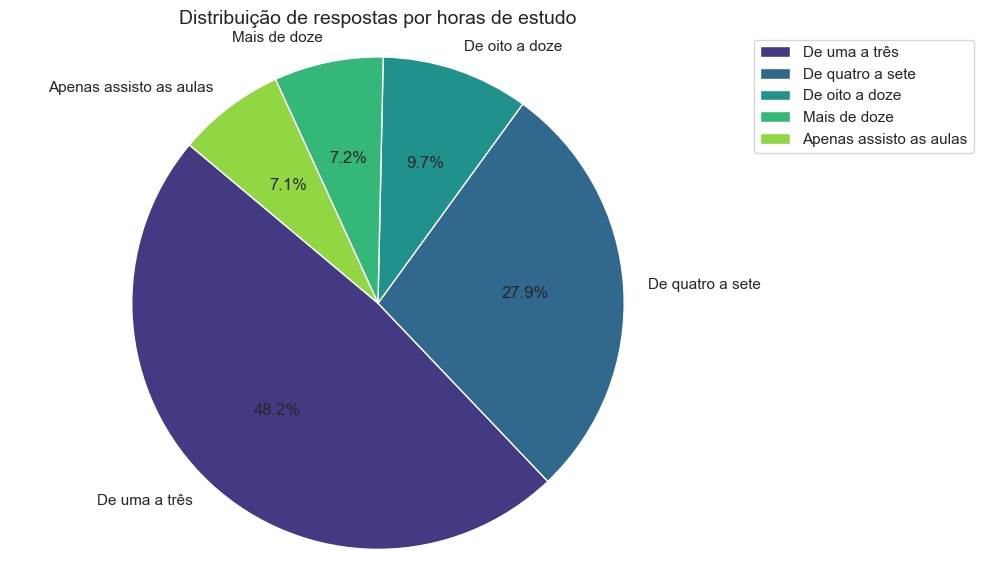

Média de respostas por categoria: 95042.2
Mediana de respostas por categoria: 45934.0
Desvio padrão de respostas por categoria: 76561.34415852428


In [5]:
# Leitura dos dados
colunas = ['ano', 'numero', 'resposta']
df = pd.read_csv('microdados2022_arq29.txt', delimiter=';', names=colunas, header=0, on_bad_lines='skip')

# Contagem das respostas
contagem_respostas = df['resposta'].value_counts()

# Dicionário para renomear os índices
dados_dic = {
    'A': 'Apenas assisto as aulas',
    'B': 'De uma a três',
    'C': 'De quatro a sete',
    'D': 'De oito a doze',
    'E': 'Mais de doze'
}
contagem_respostas.rename(index=dados_dic, inplace=True)

# Utilizando numpy para calcular estatísticas adicionais
media_respostas = np.mean(contagem_respostas.values)
mediana_respostas = np.median(contagem_respostas.values)
desvio_padrao_respostas = np.std(contagem_respostas.values)

# Configurando o estilo do seaborn
sns.set(style="whitegrid")

# Criação do gráfico de pizza com estilo seaborn
plt.figure(figsize=(10, 6))
cores = sns.color_palette('viridis', len(contagem_respostas))
contagem_respostas.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=cores, wedgeprops=dict(edgecolor='w'))

plt.title('Distribuição de respostas por horas de estudo', fontsize=14)
plt.ylabel('')
plt.legend(contagem_respostas.index, loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
plt.tight_layout()

# Salvando e exibindo o gráfico
plt.savefig('distribuicao_respostas_por_horas_de_estudo.png', dpi=300)
plt.show()

print(f"Média de respostas por categoria: {media_respostas}")
print(f"Mediana de respostas por categoria: {mediana_respostas}")
print(f"Desvio padrão de respostas por categoria: {desvio_padrao_respostas}")


# Vinícius: Quem incentivou o candidato a cursar a graduação

Média de respostas por categoria: 67888.42857142857
Mediana de respostas por categoria: 24744.0
Desvio padrão de respostas por categoria: 86989.25046046477


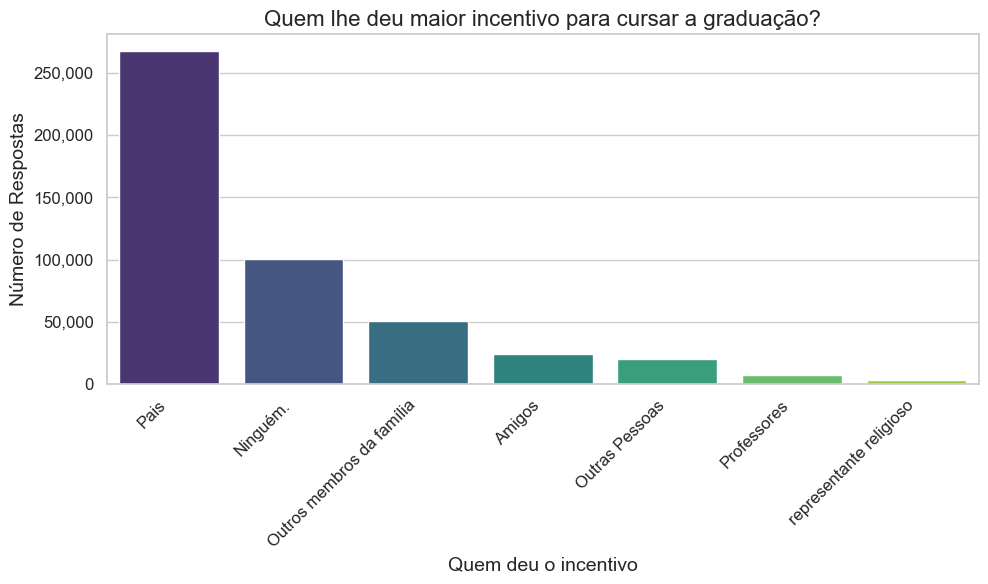

In [6]:
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

file_path = 'microdados2022_arq25.txt'
colunas = ['ano', 'numero', 'resposta']
df = pd.read_csv(file_path, delimiter=';', names=colunas, header=0, on_bad_lines='skip')
df = df.dropna(subset=['resposta'])
df = df[df['resposta'].isin(['A', 'B', 'C', 'D', 'E', 'F', 'G'])]

contagem_respostas = df['resposta'].value_counts().reindex(['A', 'B', 'C', 'D', 'E', 'F', 'G'], fill_value=0)
dados_dic = {
    'A': 'Ninguém.',
    'B': 'Pais',
    'C': 'Outros membros da família',
    'D': 'Professores',
    'E': 'representante religioso',
    'F': 'Amigos',
    'G': 'Outras Pessoas'
}

contagem_respostas.rename(index=dados_dic, inplace=True)
contagem_respostas = contagem_respostas.sort_values(ascending=False)

media_respostas = np.mean(contagem_respostas.values)
mediana_respostas = np.median(contagem_respostas.values)
desvio_padrao_respostas = np.std(contagem_respostas.values)
print(f"Média de respostas por categoria: {media_respostas}")
print(f"Mediana de respostas por categoria: {mediana_respostas}")
print(f"Desvio padrão de respostas por categoria: {desvio_padrao_respostas}")

plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=contagem_respostas.index, y=contagem_respostas.values, palette='viridis')
barplot.set_title('Quem lhe deu maior incentivo para cursar a graduação?', fontsize=16)
barplot.set_xlabel('Quem deu o incentivo', fontsize=14)
barplot.set_ylabel('Número de Respostas', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

from matplotlib.ticker import FuncFormatter
barplot.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.savefig('influencia_atualizada.png', dpi=300)
plt.show()
